clustering analysis on graph

In [52]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os 

# set path to the main directory
path_to_main = "/workspaces/EAI/AISafetyIntervention_LiteratureExtraction/"
os.chdir(path_to_main + "clustering")

import clustering

In [53]:
# visualization
def plot_communities(G, list_community):
    num_communities = len(list_community)
    
    # Create a colormap with enough distinct colors
    if num_communities <= 10:
        # Use qualitative colormap for small number of communities
        cmap = cm.get_cmap('tab10')
    else:
        # Use rainbow colormap for many communities
        cmap = cm.get_cmap('rainbow')
    
    # Create node-to-community mapping for efficient lookup
    node_to_community = {}
    for i, community in enumerate(list_community):
        for node in community:
            node_to_community[node] = i
    
    # Generate colors efficiently
    color_map = []
    for node in G.nodes():
        if node in node_to_community:
            community_idx = node_to_community[node]
            # Normalize index to [0, 1] for colormap
            normalized_idx = community_idx / max(1, num_communities - 1)
            color = cmap(normalized_idx)
        else:
            color = 'gray'  # Unassigned nodes
        color_map.append(color)
    
    # Memory-efficient plotting for GTX 1650 Max-Q
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    pos = nx.kamada_kawai_layout(G)
    
    # Original graph
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_size=300, 
            node_color='lightgray', edge_color='gray')
    axes[0].set_title("Original Graph")
    
    # Community colored graph
    nx.draw(G, pos, ax=axes[1], with_labels=True, font_size=9, 
            node_size=500, node_color=color_map, font_color="black",
            edge_color='lightgray', alpha=0.8)
    axes[1].set_title(f"Communities (k={num_communities})")
    
    plt.tight_layout()
    plt.show()


## example 1

/tmp/ipykernel_36105/2340509565.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


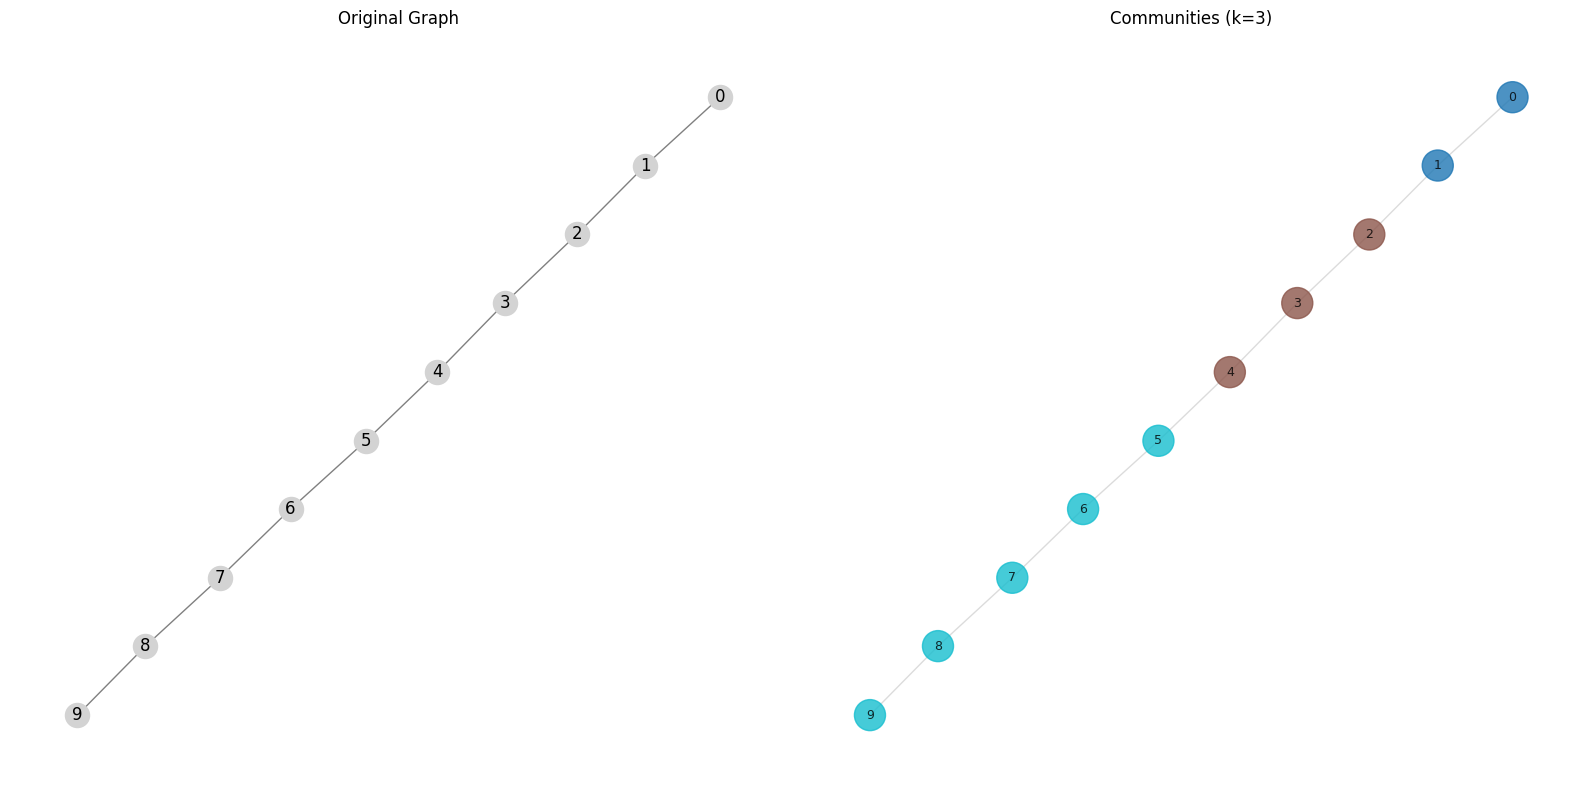

In [54]:
# example
G = nx.path_graph(10)
num_clusters=3
list_community = clustering.get_clusters_girvan_newman(G, num_clusters)
assert num_clusters == len(list_community)
plot_communities(G, list_community)

## example 2

/tmp/ipykernel_36105/2340509565.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


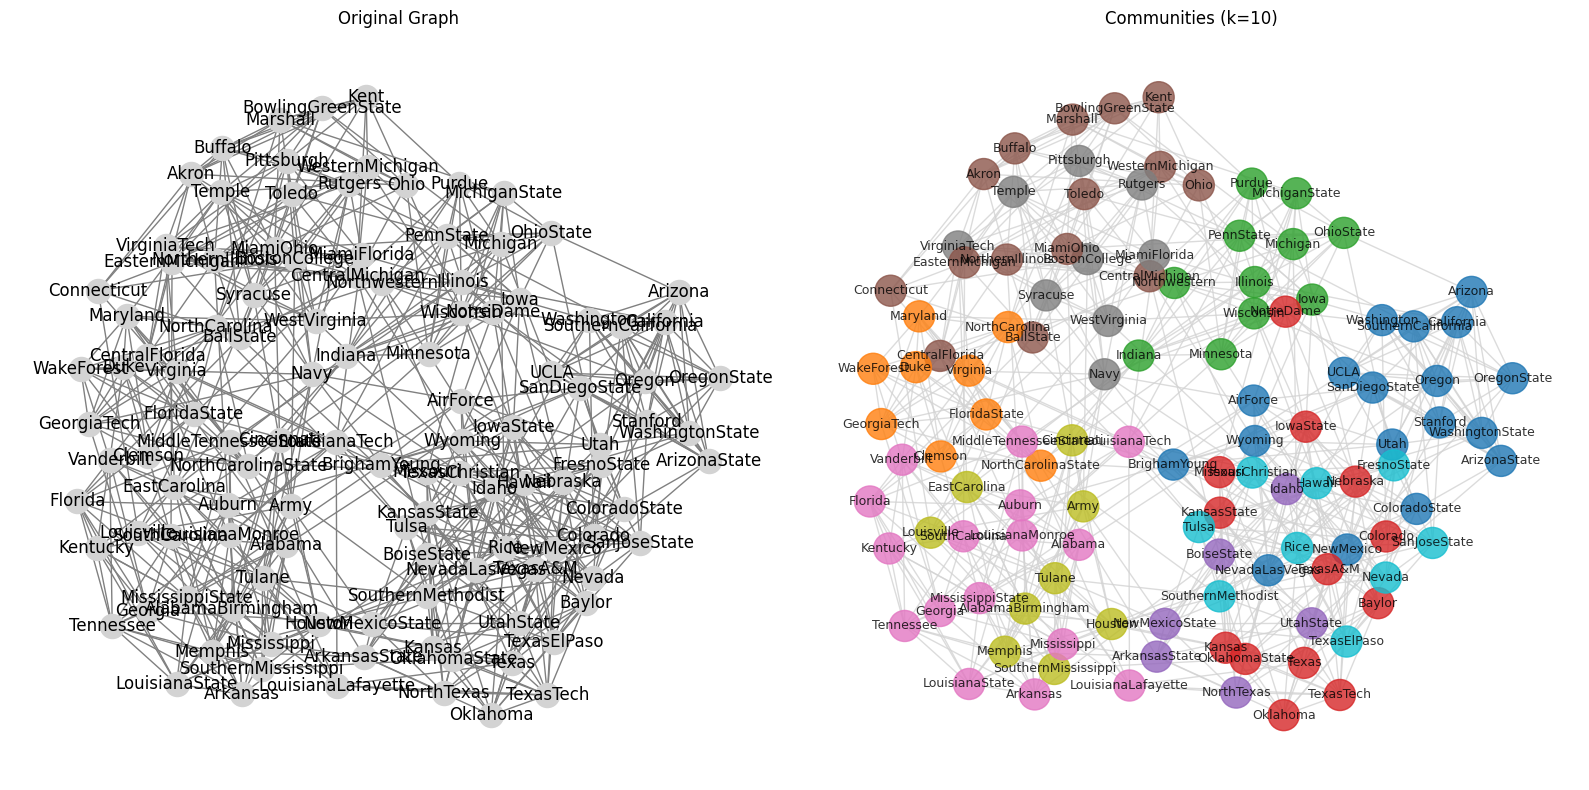

In [55]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data
num_clusters = 10
list_community = clustering.get_clusters_girvan_newman(G, num_clusters)
assert num_clusters == len(list_community)

plot_communities(G, list_community)

## example 3

/tmp/ipykernel_36105/2340509565.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


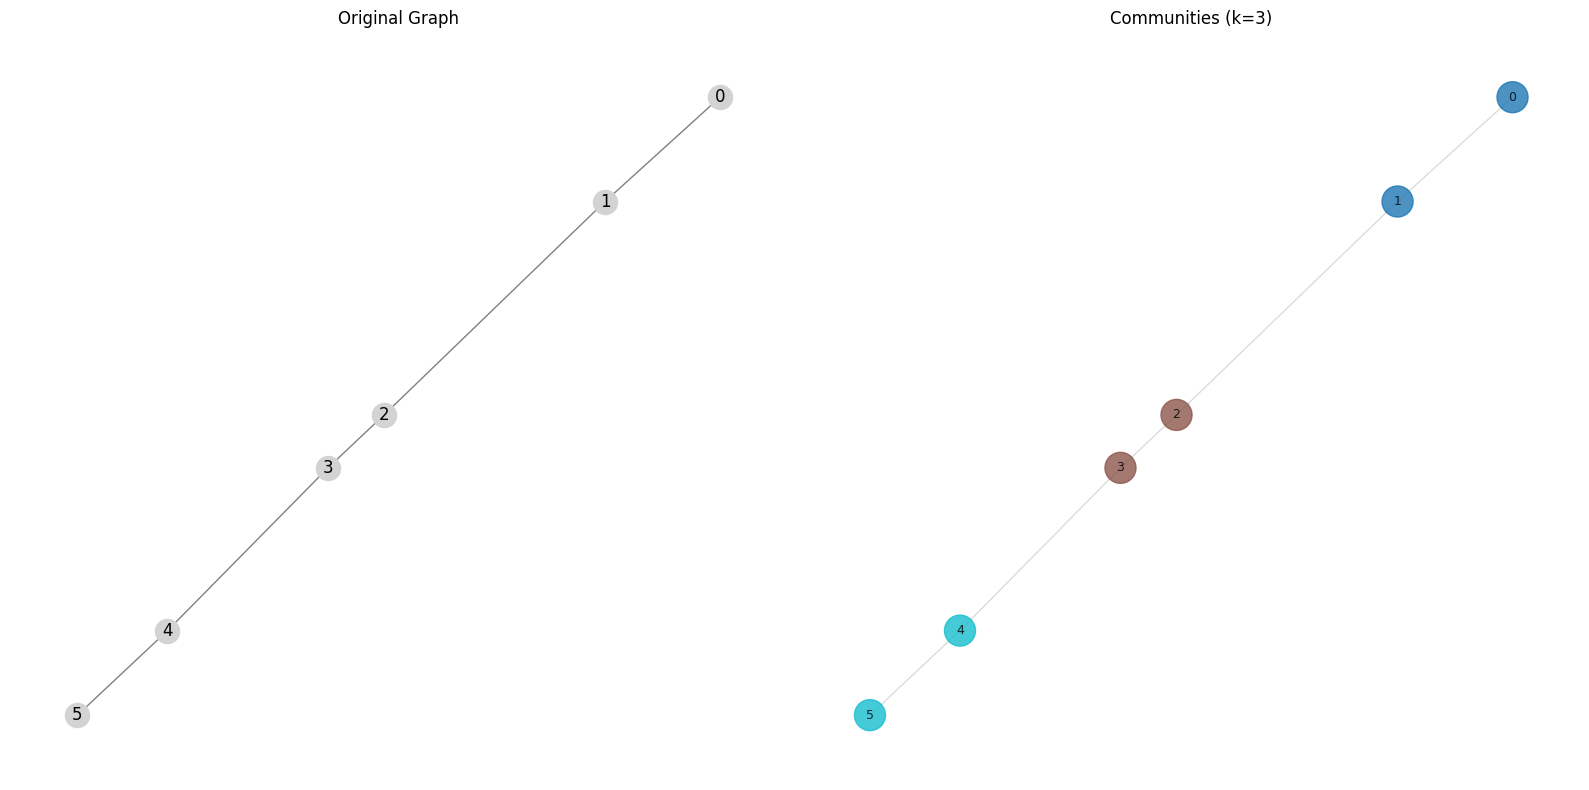

In [56]:
# try another measure 

# all edges needs to have weight to use this measure
def heaviest(G):    
    from operator import itemgetter
    u, v, _ = max(G.edges(data="weight"), key=itemgetter(2))
    return (u, v)

num_clusters = 3
G = nx.Graph()
G.add_weighted_edges_from([
    (0, 1, 1.0), (1, 2, 2.0), (2, 3, 0.5),
    (3, 4, 1.5), (4, 5, 0.8)
])

list_community = clustering.get_clusters_girvan_newman(G, num_clusters, most_valuable_edge=heaviest)
plot_communities(G, list_community)